In [27]:
import pandas as pd
import numpy as np
import json
import requests
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
zip_file_path = 'archive.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_name = zip_ref.namelist()[0]
    with zip_ref.open(file_name) as file:
        df = pd.read_csv(file, index_col=0)
df.head()

#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    #for file_name in zip_ref.namelist():
        #if file_name.endswith('.csv'):
            #with zip_ref.open(file_name) as file:
                #df = pd.read_csv(file)
                #dfs.append(df)
#merged_df = pd.concat(dfs, ignore_index=True) - якщо в нас декілька .csv in zip
#print(merged_df.head())

# import chardet - ЯКЩО ПОМИЛКА РОЗШИФРОВКИ КОДУВАННЯ
# file_path = 'archive.zip'
# with open(file_path, 'rb') as f:
#     result = chardet.detect(f.read())
# print(f"The detected encoding is: {result['encoding']} with confidence {result['confidence']}")

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB


In [57]:
df.isna().sum()

Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [60]:
df[df.isna().any(axis=1)]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


In [65]:
df.dropna(inplace=True)

In [66]:
df[df.isna().any(axis=1)]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist


In [70]:
cut_df = df.drop(['Summary', 'Reviews'], axis=1)

In [72]:
cut_df.duplicated().sum()

392

In [78]:
cut_df[cut_df.duplicated()==True]

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
326,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']",17K,3.8K,4.6K,4.8K
327,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",21K,3.2K,6.3K,3.6K
328,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",30K,2.5K,5K,2.6K
329,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",28K,679,4.9K,1.8K
330,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...
1268,Bloodstained: Curse of the Moon,"May 23, 2018",['Inti Creates'],3.6,341,341,"['Adventure', 'Indie', 'Platform']",2.3K,41,800,397
1269,Final Fantasy XIII-2,"Dec 15, 2011",['Square Enix'],3.3,482,482,"['Adventure', 'RPG']",2.3K,58,1.4K,449
1270,Agar.io,"Apr 28, 2015","['Miniclip.com', 'Matheus Valadares']",2.2,81,81,"['Indie', 'Strategy']",4.4K,8,40,12
1271,Fatal Frame II: Crimson Butterfly,"Nov 27, 2003","['Tecmo Co., Ltd.', 'Ubisoft Entertainment']",4.2,398,398,['Adventure'],1K,38,690,513


In [80]:
cut_df[cut_df['Title']=='Hollow Knight']

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K
330,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K
780,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",21K,2.4K,8.3K,2.3K


In [97]:
filterr = df[df['Title']=='Hollow Knight']
pd.set_option('display.max_colwidth', 20)
print(filterr['Summary'])

4      A 2D metroidvani...
330    A 2D metroidvani...
780    A 2D metroidvani...
Name: Summary, dtype: object


In [100]:
cut_df.drop_duplicates(inplace=True)

In [102]:
numeric_col =['Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']
for columns in numeric_col:
    cut_df[columns]=cut_df[columns].str.replace('K', '000', regex=False).str.replace('.','').astype('int')

In [103]:
cut_df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022",['Bandai Namco E...,4.5,39000,39000,"['Adventure', 'R...",17000,38000,46000,48000
1,Hades,"Dec 10, 2019",['Supergiant Gam...,4.3,29000,29000,"['Adventure', 'B...",21000,32000,63000,36000
2,The Legend of Ze...,"Mar 03, 2017","['Nintendo', 'Ni...",4.4,43000,43000,"['Adventure', 'R...",30000,25000,5000,26000
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,35000,35000,"['Adventure', 'I...",28000,679,49000,18000
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3000,3000,"['Adventure', 'I...",21000,24000,83000,23000


In [105]:
import ast
cut_df['Genres'] = cut_df['Genres'].apply(ast.literal_eval)
cut_df['Team'] = cut_df['Team'].apply(ast.literal_eval)

In [106]:
cut_df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022",[Bandai Namco En...,4.5,39000,39000,"[Adventure, RPG]",17000,38000,46000,48000
1,Hades,"Dec 10, 2019",[Supergiant Games],4.3,29000,29000,"[Adventure, Braw...",21000,32000,63000,36000
2,The Legend of Ze...,"Mar 03, 2017","[Nintendo, Ninte...",4.4,43000,43000,"[Adventure, RPG]",30000,25000,5000,26000
3,Undertale,"Sep 15, 2015","[tobyfox, 8-4]",4.2,35000,35000,"[Adventure, Indi...",28000,679,49000,18000
4,Hollow Knight,"Feb 24, 2017",[Team Cherry],4.4,3000,3000,"[Adventure, Indi...",21000,24000,83000,23000


In [107]:
cut_df["Release Date"] = pd.to_datetime(cut_df["Release Date"])

ValueError: time data "releases on TBD" doesn't match format "%b %d, %Y", at position 420. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [113]:
words_in_date = cut_df[cut_df['Release Date'] == 'releases on TBD'].index
cut_df = cut_df.drop(index=words_in_date, axis=0)
cut_df["Release Date"] = pd.to_datetime(cut_df["Release Date"])

In [114]:
cut_df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,[Bandai Namco En...,4.5,39000,39000,"[Adventure, RPG]",17000,38000,46000,48000
1,Hades,2019-12-10,[Supergiant Games],4.3,29000,29000,"[Adventure, Braw...",21000,32000,63000,36000
2,The Legend of Ze...,2017-03-03,"[Nintendo, Ninte...",4.4,43000,43000,"[Adventure, RPG]",30000,25000,5000,26000
3,Undertale,2015-09-15,"[tobyfox, 8-4]",4.2,35000,35000,"[Adventure, Indi...",28000,679,49000,18000
4,Hollow Knight,2017-02-24,[Team Cherry],4.4,3000,3000,"[Adventure, Indi...",21000,24000,83000,23000


In [126]:
dublicate = cut_df.explode('Genres')
dublicate

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,[Bandai Namco En...,4.5,39000,39000,Adventure,17000,38000,46000,48000
0,Elden Ring,2022-02-25,[Bandai Namco En...,4.5,39000,39000,RPG,17000,38000,46000,48000
1,Hades,2019-12-10,[Supergiant Games],4.3,29000,29000,Adventure,21000,32000,63000,36000
1,Hades,2019-12-10,[Supergiant Games],4.3,29000,29000,Brawler,21000,32000,63000,36000
1,Hades,2019-12-10,[Supergiant Games],4.3,29000,29000,Indie,21000,32000,63000,36000
...,...,...,...,...,...,...,...,...,...,...,...
1510,Baldur's Gate 3,2020-10-06,[Larian Studios],4.1,165,165,Strategy,269,79,388,602
1510,Baldur's Gate 3,2020-10-06,[Larian Studios],4.1,165,165,Tactical,269,79,388,602
1510,Baldur's Gate 3,2020-10-06,[Larian Studios],4.1,165,165,Turn Based Strategy,269,79,388,602
1511,The LEGO Movie V...,2014-02-04,"[WB Games, TT Fu...",2.8,184,184,Adventure,17000,11,239,73


In [133]:
genres_count = dublicate['Genres'].value_counts()
genres_count

Genres
Adventure              717
RPG                    359
Shooter                260
Platform               241
Indie                  205
Puzzle                 131
Strategy               116
Brawler                104
Simulator               94
Turn Based Strategy     71
Fighting                64
Arcade                  60
Visual Novel            53
Tactical                42
Racing                  37
Point-and-Click         36
Music                   20
Sport                   20
Card & Board Game       13
Real Time Strategy       9
Quiz/Trivia              3
MOBA                     2
Pinball                  1
Name: count, dtype: int64

In [135]:
dublicate_team = cut_df.explode('Team')
team_count = dublicate_team['Team'].value_counts()
team_count

Team
Nintendo             173
Capcom                64
Square Enix           57
Sega                  45
Electronic Arts       42
                    ... 
Nazca Corporation      1
A Grumpy Fox           1
Feral Interactive      1
Jason Roberts          1
TT Fusion              1
Name: count, Length: 658, dtype: int64

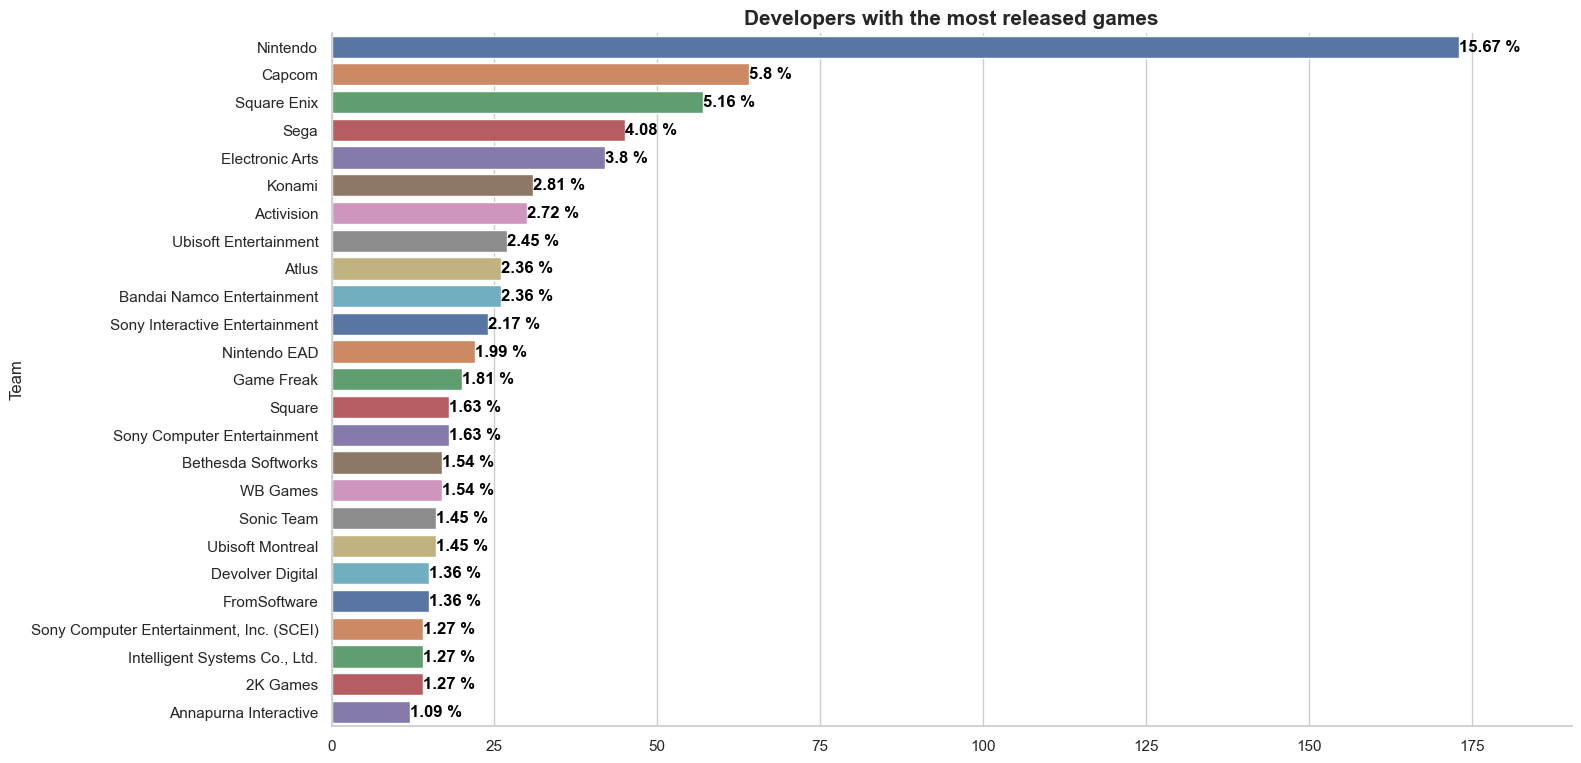

In [320]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x=team_count[:25].values, y=team_count[:25].index, palette='deep')
ax.set_title("Developers with the most released games", fontsize=15, weight='bold')

for i, v in enumerate(team_count[:25].values):
    ax.text(v, i, str(round(v / len(cut_df) * 100, 2)) + ' %', color="black", ha="left", va="center", fontsize=12, weight='bold')
ax.set_xlim(right=max(team_count.values) * 1.1)
sns.despine(right=True, top=True)
plt.show()

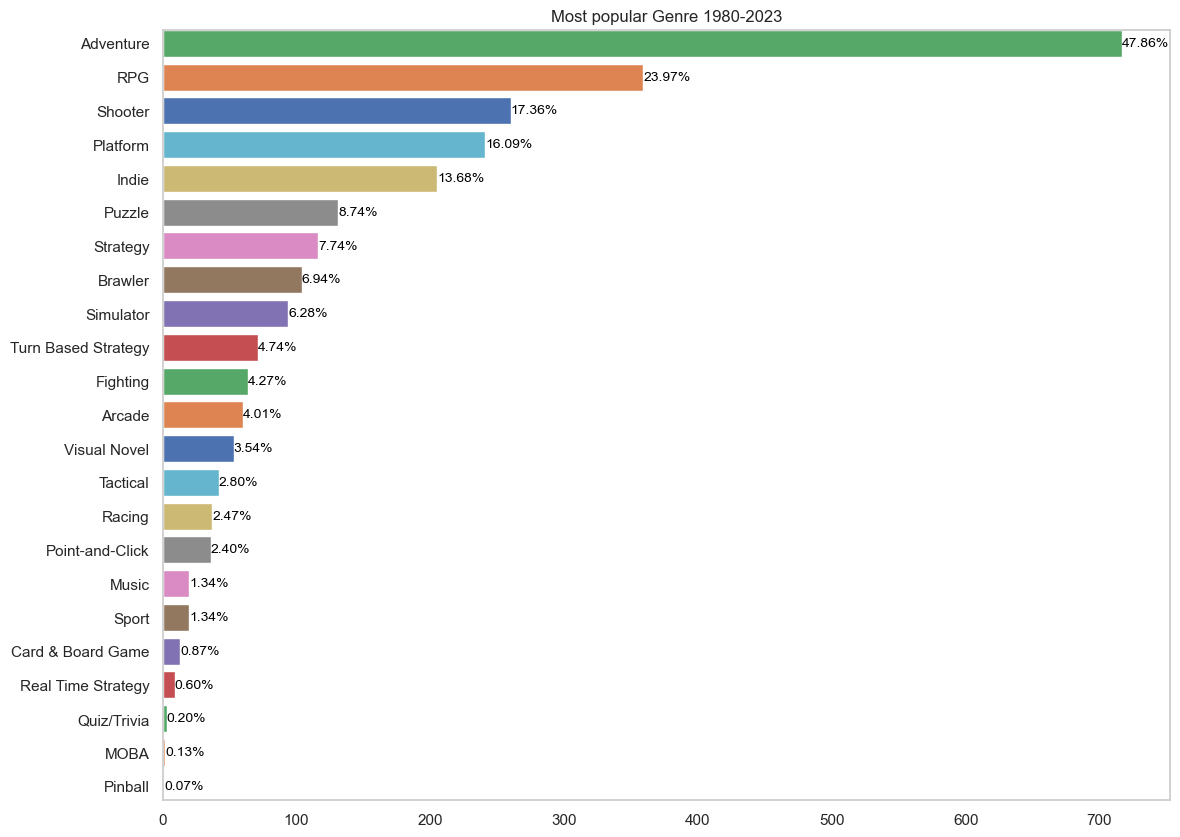

In [186]:

plt.figure(figsize=(13, 10))
sorted_genres_count = genres_count.sort_values(ascending=True)
colors = sns.color_palette('deep', len(sorted_genres_count))
bars=plt.barh(sorted_genres_count.index, sorted_genres_count.values, color=colors)

plt.title('Most popular Genre 1980-2023')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width() / len(cut_df) * 100:.2f}%', 
             va='center', ha='left', fontsize=10, color='black')
    plt.margins(y=0)
    plt.grid(False)
plt.show()

In [267]:
import calendar

grouped_data_bw = cut_df.groupby('Month').agg({'Backlogs': 'mean', 'Wishlist': 'mean'}).reset_index()

month_order = list(calendar.month_name)[1:]

grouped_data_bw['Month'] = pd.Categorical(grouped_data_bw['Month'], categories=month_order, ordered=True)
grouped_data_bw = grouped_data_bw.sort_values('Month')

print(grouped_data_bw)

        Month      Backlogs     Wishlist
4     January  10404.000000  3217.016129
3    February  10168.141176  4368.482353
7       March  10475.132653  4502.010204
0       April  11058.803279  4334.540984
8         May   9460.103448  4612.689655
6        June   7901.371429  3066.914286
5        July   8063.231884  3093.434783
1      August   7625.376623  2269.467532
11  September   7617.593985  2634.398496
10    October   8322.546099  2757.822695
9    November   7439.645963  2204.602484
2    December   6238.966292  2749.640449


In [268]:

grouped_data_bw

,Month,Backlogs,Wishlist
4,January,10404.000000,3217.016129
3,February,10168.141176,4368.482353
7,March,10475.132653,4502.010204
0,April,11058.803279,4334.540984
8,May,9460.103448,4612.689655
6,June,7901.371429,3066.914286
5,July,8063.231884,3093.434783
1,August,7625.376623,2269.467532
11,September,7617.593985,2634.398496
10,October,8322.546099,2757.822695


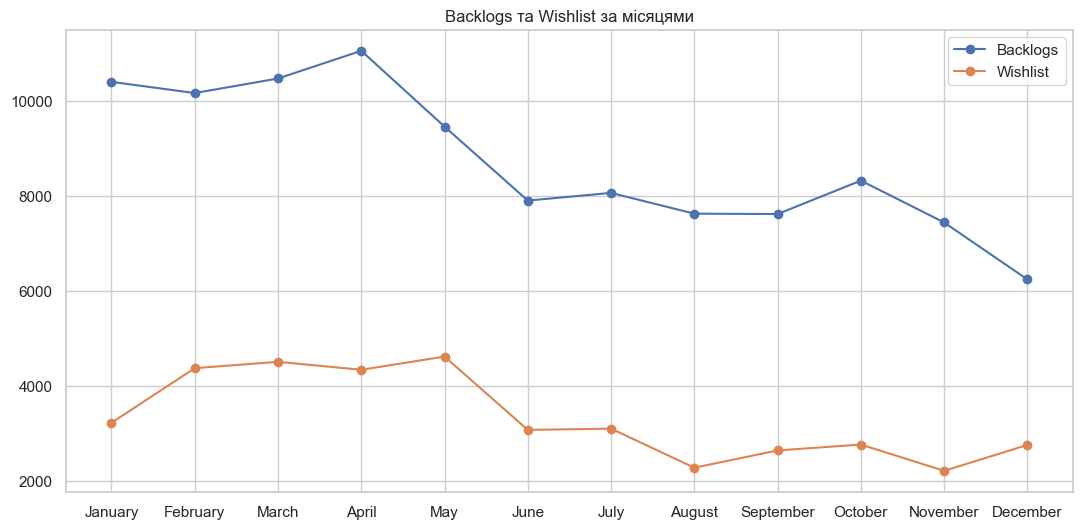

In [333]:
plt.figure(figsize=(13, 6))

plt.plot(grouped_data_bw['Month'], grouped_data_bw['Backlogs'], label='Backlogs', marker='o')
plt.plot(grouped_data_bw['Month'], grouped_data_bw['Wishlist'], label='Wishlist', marker='o')

plt.title('Backlogs та Wishlist за місяцями')


plt.legend()

plt.show()

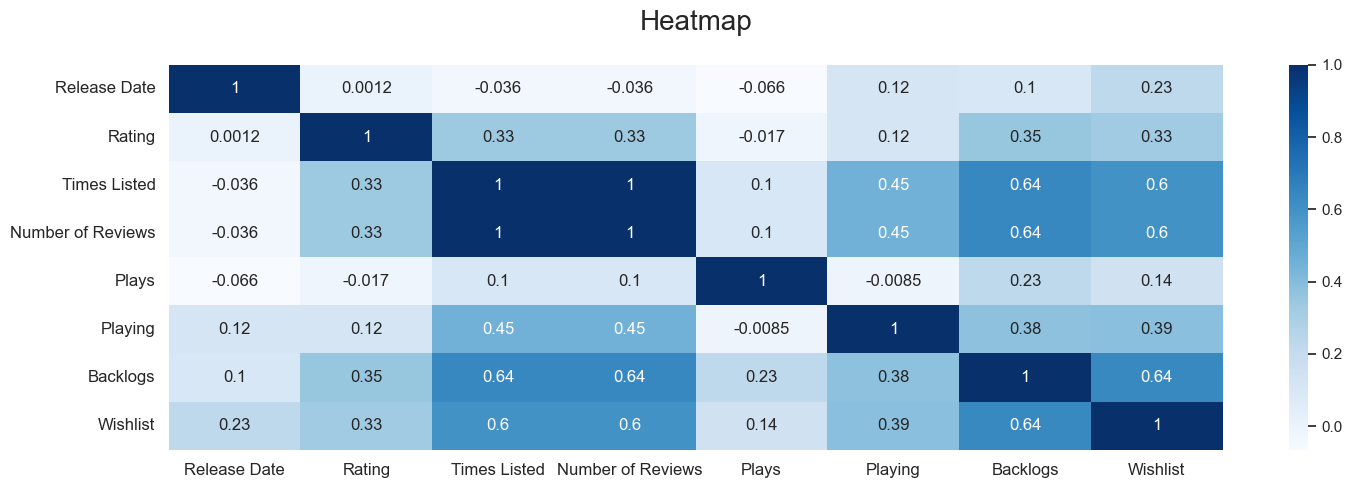

In [352]:
df_int = cut_df.drop(['Title', 'Team','Genres','Year','Month'], axis=1)

cor = df_int.corr()

fig, ax = plt.subplots(figsize=(17, 5))

sns.heatmap(cor, annot=True, cmap="Blues", annot_kws={"size": 12}, ax=ax)

ax.set_title("Heatmap", fontsize=20, pad=25)

ax.tick_params(axis="both", labelsize=12)

plt.show()

In [227]:
grouped_data_games = cut_df.groupby('Month')['Title'].count().reset_index()

In [228]:
grouped_data_games

,Month,Title
0,April,61
1,August,77
2,December,89
3,February,85
4,January,62
5,July,69
6,June,70
7,March,98
8,May,58
9,November,161


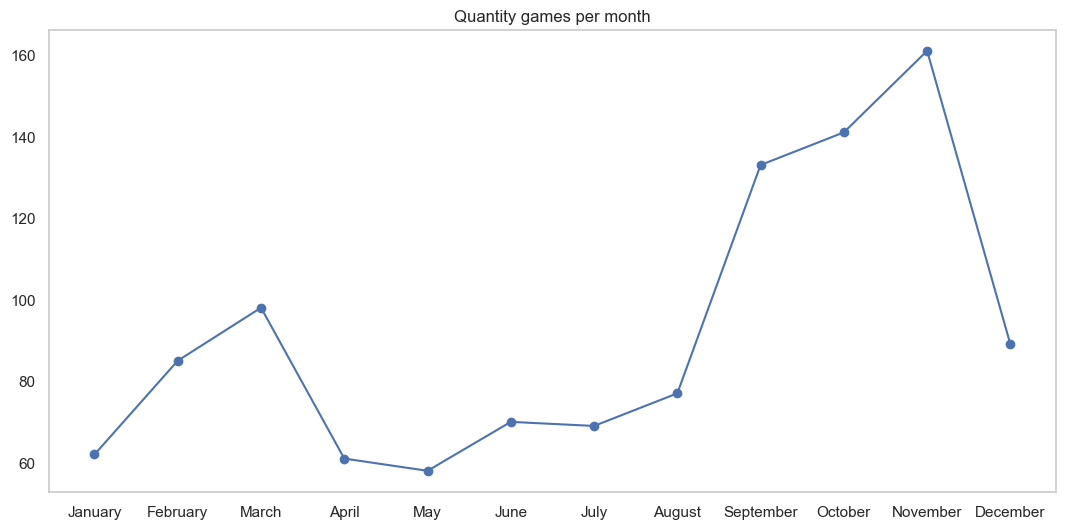

In [274]:
import calendar

month_order = list(calendar.month_name)[1:]

grouped_data_games['Month'] = pd.Categorical(grouped_data_games['Month'], categories=month_order, ordered=True)
grouped_data_games = grouped_data_games.sort_values('Month')

plt.figure(figsize=(13, 6))

plt.plot(grouped_data_games['Month'], grouped_data_games['Title'], marker='o', linestyle='-')

plt.title('Quantity games per month')
plt.grid(False)
plt.show()

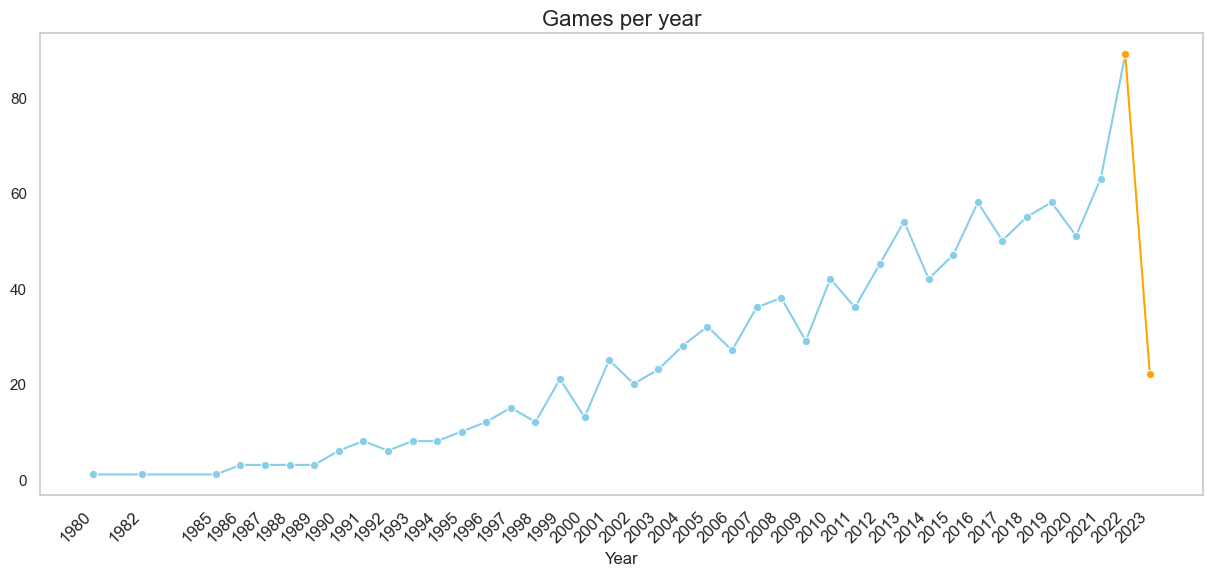

In [319]:
count_games_per_year = cut_df['Year'].value_counts().sort_index()

sns.set(style="whitegrid")


plt.figure(figsize=(15, 6))


sns.lineplot(x=count_games_per_year.index[:-1], y=count_games_per_year.values[:-1], marker='o', color='skyblue')

sns.lineplot(x=count_games_per_year.index[-2:], y=count_games_per_year.values[-2:], marker='o', color='orange')

plt.title('Games per year', fontsize=16)



plt.xticks(count_games_per_year.index, rotation=45, ha='right', fontsize=12)
plt.grid(False)

plt.show()
# За 2023 в датасеті не всі дані

In [282]:
rating_df = df.groupby('Genres')['Rating'].mean().reset_index()
rating

Genres
Adventure              3.701255
Arcade                 3.518333
Brawler                3.656731
Card & Board Game      3.538462
Fighting               3.387500
Indie                  3.642927
MOBA                   2.400000
Music                  3.535000
Pinball                3.500000
Platform               3.633195
Point-and-Click        3.658333
Puzzle                 3.735878
Quiz/Trivia            3.300000
RPG                    3.780223
Racing                 3.527027
Real Time Strategy     3.622222
Shooter                3.601538
Simulator              3.627660
Sport                  3.520000
Strategy               3.596552
Tactical               3.752381
Turn Based Strategy    3.821127
Visual Novel           4.005660
Name: Rating, dtype: float64

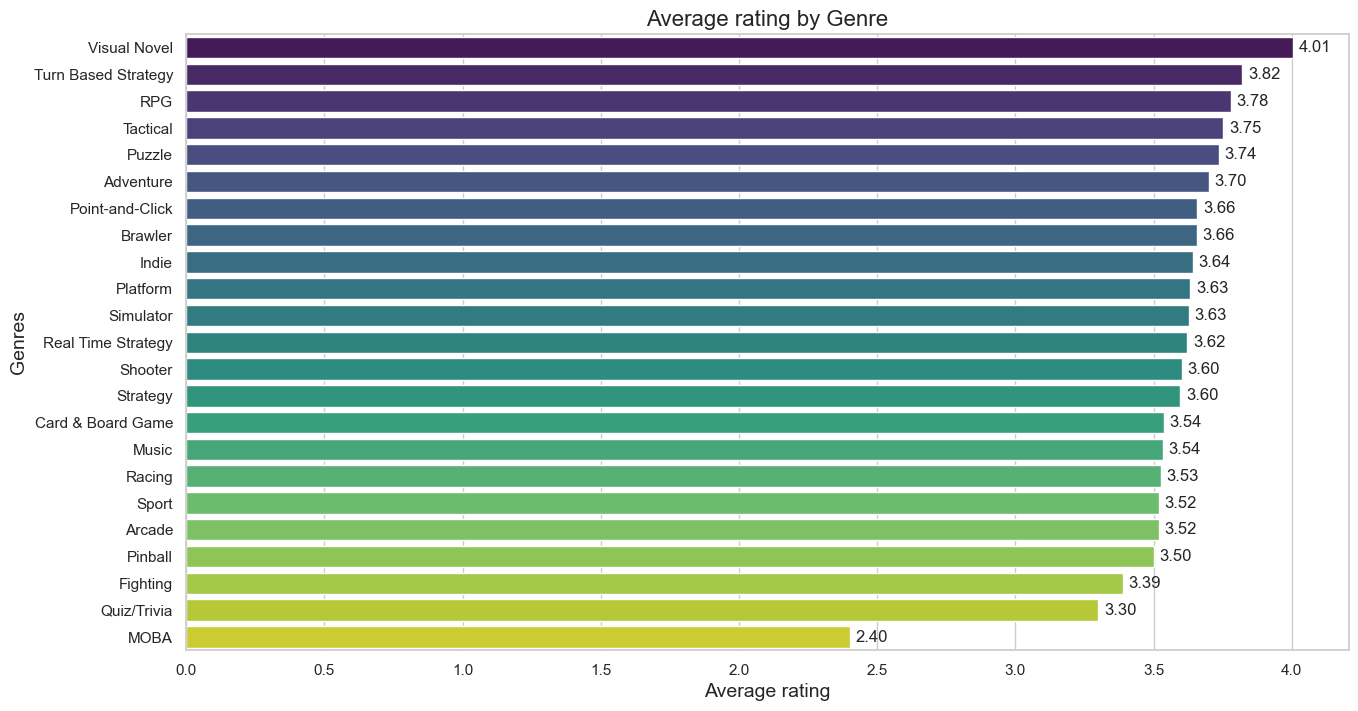

In [296]:
sns.set(style="whitegrid")


plt.figure(figsize=(15, 8))


sorted_rating = rating.sort_values(ascending=False)


sns.barplot(x=sorted_rating.values, y=sorted_rating.index, palette="viridis")


plt.title('Average rating by Genre', fontsize=16)
plt.xlabel('Average rating', fontsize=14)
plt.ylabel('Genres', fontsize=14)
for i, value in enumerate(sorted_rating.values):
    plt.text(value + 0.02, i, f'{value:.2f}', va='center', fontsize=12)

plt.show()

Findings Summary

- the number of video games increased every year (except for 2023, due to incomplete data), while there was a significant jump from 2021 to 2022;
 - the most popular genres: adventures, RPGs, shooters, while the visual novel genre and other similar non-stressful genres take the top 1 rating, perhaps there is a significant correlation in this - the more difficult and stressful the game, the lower the rating, for example, the MOBA genre;
 - there is also a correlation between the wish list and Backlogs;
 - the most games are released in November, followed by October and September, i.e. autumn is the most popular season for developers, perhaps this is due to the subsequent holidays, when people give themselves and others gifts;
 - Nintendo released 15.67% of all games in the dataset during the period 1980-2023, followed by Capcom with 5.8% and Square Enix with 5.16%.

Висновки

 - кількість відеоігор з кожним роком збільшувалась(окрім 2023, через неповні дані), при цьому був значний стрибок з 2021 по 2022 рр.;
 - найпопулярніші жанри: пригоди, РПГ,  шутери, при цьому по рейтингу топ-1 займає жанр візуальних новел та інші подібні не стресові жанри, можливо в цьому є значна кореляція - чим складніша і стресовіша гра, тим нижча оцінка, наприклад жанр MOBA;
 - також є кореляція між списком бажань і Backlogs;
 - найбільше ігор випускається в листопаді, потім йде жовтень і вересень, тобто по сезону найпопулярнішим для розробників є осінь, можливо це пов'язано з подальшими святами, коли люди роблять собі та іншим подарунки;
 - Nintendo в період за 1980-2023 випустило 15,67% всіх ігор в датасеті, після них йдуть Capcom з 5,8% та Square Enix - 5,16%.

In [324]:
dfrating = pd.DataFrame({'Жанр': rating.index, 'Середня оцінка': rating.values})

dfrating.to_csv('rating.csv', index=False)

In [346]:
p = pd.DataFrame({'Жанр': count_games_per_year.index, 'Середня оцінка': count_games_per_year.values})
p.to_csv('v.csv', index=False)

In [330]:
grouped_data_games.to_csv('f.csv', index=False)

In [332]:
grouped_data_bw.to_csv('g.csv', index=False)

In [334]:
sorted_genres_count.to_csv('k.csv', index=False)

In [341]:
k = pd.DataFrame({'Genre': sorted_genres_count.index, 'Count': sorted_genres_count.values})
k.to_csv('l.csv', index=False)

In [342]:
z = pd.DataFrame({'Team': team_count.index, 'Count': team_count.values})
z.to_csv('r.csv', index=False)

In [345]:
cut_df.to_csv('df.csv', sep=';', index=False)

In [344]:
cut_df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Plays,Playing,Backlogs,Wishlist,Year,Month
0,Elden Ring,2022-02-25,[Bandai Namco En...,4.5,39000,39000,"[Adventure, RPG]",17000,38000,46000,48000,2022,February
1,Hades,2019-12-10,[Supergiant Games],4.3,29000,29000,"[Adventure, Braw...",21000,32000,63000,36000,2019,December
2,The Legend of Ze...,2017-03-03,"[Nintendo, Ninte...",4.4,43000,43000,"[Adventure, RPG]",30000,25000,5000,26000,2017,March
3,Undertale,2015-09-15,"[tobyfox, 8-4]",4.2,35000,35000,"[Adventure, Indi...",28000,679,49000,18000,2015,September
4,Hollow Knight,2017-02-24,[Team Cherry],4.4,3000,3000,"[Adventure, Indi...",21000,24000,83000,23000,2017,February
